In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## Load in the fields

In [10]:
# the simulation's native fields 
native_path = "../../../../../cscratch1/sd/jupiter/sim2_z3_FGPA_cgs.h5"
# the derived fields from lya_fields.py
derived_path = "derived_fields_test.h5"

h5_nat = h5py.File(native_path,'r')
h5_der = h5py.File(derived_path,'r')

In [11]:
h5_der.keys()

<KeysViewHDF5 ['nhi', 'tau_real', 'tau_red']>

In [18]:
# take a cross-section parallel to the yz-plane
ind = 2

treal = h5_der['tau_real'][ind,...]
tred = h5_der['tau_red'][ind,...]
n_hi = h5_der['nhi'][ind,...]

n = treal.shape[0] # dimension of each derived field

rhob = h5_nat['native_fields']['baryon_density'][ind,:n,:n]
temp = h5_nat['native_fields']['temperature'][ind,:n,:n]
vel = h5_nat['native_fields']['velocity_z'][ind,:n,:n]

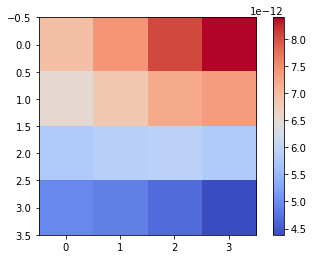

In [19]:
# try plotting one slice
plt.imshow(n_hi, cmap='coolwarm')
plt.colorbar()

plt.show()

## Plot cross-sections

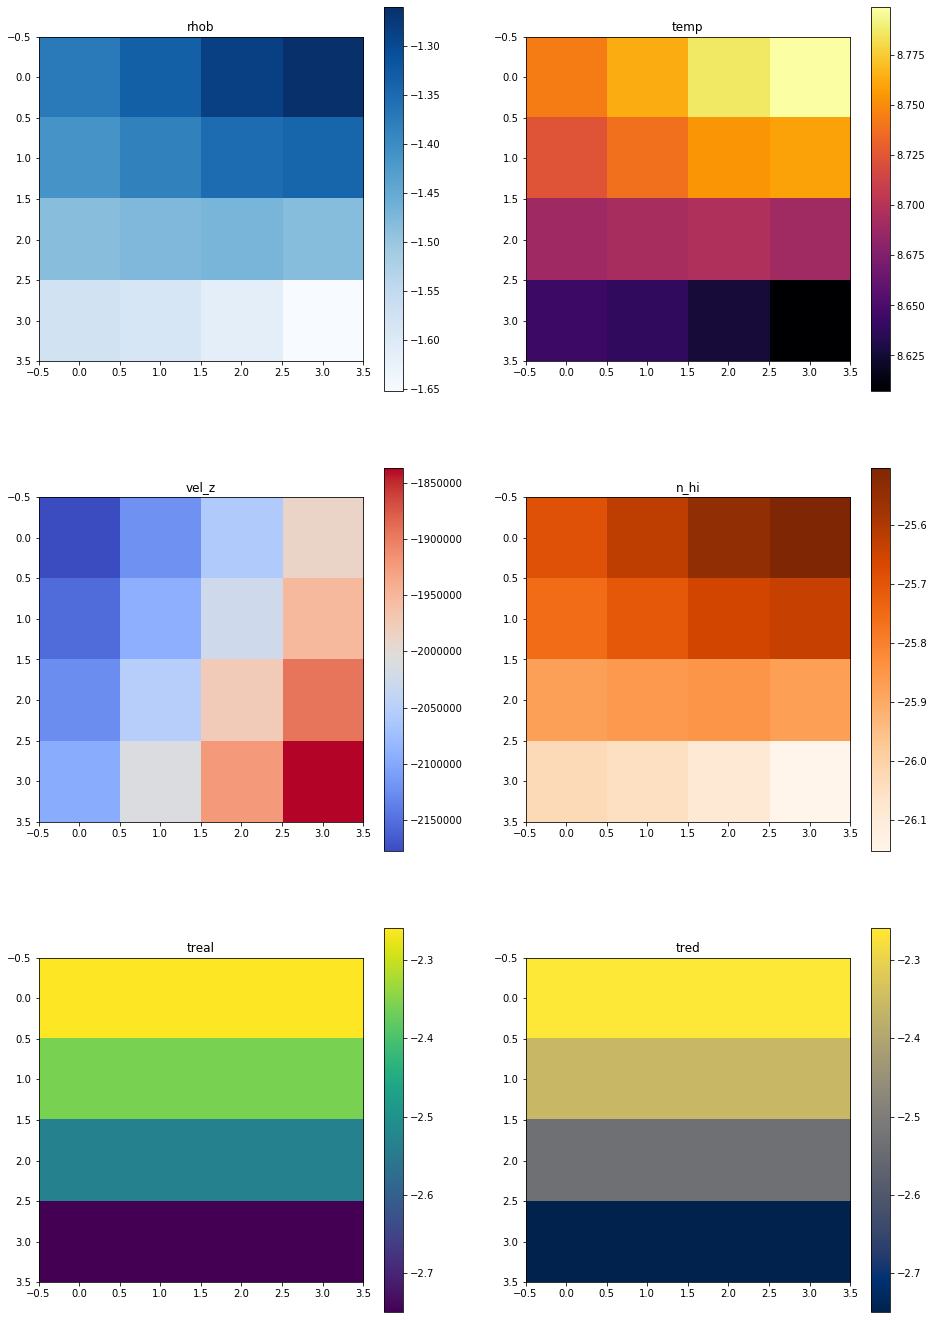

In [20]:
# plot the six slices
fig, axes = plt.subplots(3, 2, figsize=(16,24))

im1 = axes[0,0].imshow(np.log(rhob), cmap='Blues')
axes[0,0].set_title("rhob")
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(np.log(temp), cmap='inferno')
axes[0,1].set_title("temp")
fig.colorbar(im2, ax=axes[0,1])

im3 = axes[1,0].imshow(vel, cmap='coolwarm')
axes[1,0].set_title("vel_z")
fig.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(np.log(n_hi), cmap='Oranges')
axes[1,1].set_title("n_hi")
fig.colorbar(im4, ax=axes[1,1])

im5 = axes[2,0].imshow(np.log(treal), cmap='viridis')
axes[2,0].set_title("treal")
fig.colorbar(im5, ax=axes[2,0])

im6 = axes[2,1].imshow(np.log(tred), cmap='cividis')
axes[2,1].set_title("tred")
fig.colorbar(im6, ax=axes[2,1])

plt.show()

In [23]:
# check that treal and tred don't have uniform rows
print(treal)
print(tred)

[[0.10443387 0.10443384 0.10443366 0.10443369]
 [0.09454643 0.0945464  0.09454625 0.09454628]
 [0.07926213 0.07926209 0.07926208 0.07926212]
 [0.06395804 0.06395795 0.06395823 0.06395832]]
[[0.10443366 0.10443351 0.10443387 0.10443402]
 [0.09454624 0.09454601 0.09454644 0.09454667]
 [0.07926203 0.07926156 0.07926218 0.07926265]
 [0.06395821 0.0639572  0.06395806 0.06395907]]


## Close HDF5 files

In [24]:
h5_nat.close()
h5_der.close()